<a href="https://colab.research.google.com/github/pranjalsinha1205/MagicGammaTelescope/blob/main/MagicGammaTelescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("/content/magic04.data")
df.head()

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.011  -8.2027  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887   9.8145   

    40.092  81.8828  g  
0   6.3609  205.261  g  
1  76.9600  256.788  g  
2  10.4490  116.737  g  
3   4.6480  356.462  g  
4   3.6130  238.098  g

In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df.columns = cols
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist class  
0   6.3609  205.261     g  
1  76.9600  256.788     g  
2  10.4490  116.737     g  
3   4.6480  356.462     g  
4   3.6130  238.098     g

In [4]:
df['class'] = (df['class']=='g').astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist  class  
0   6.3609  205.261      1  
1  76.9600  256.788      1  
2  10.4490  116.737      1  
3   4.6480  356.462      1  
4   3.6130  238.098      1

Classification means predicting discrete classes

It is of 2 types:-

i) Binary classification (yes or no/ positive or negative)

ii) Multiclass classification (pizza, burger, noodles, etc)

Regression means predicting continuous values, e.g., price of ethereum, temperature, etc.

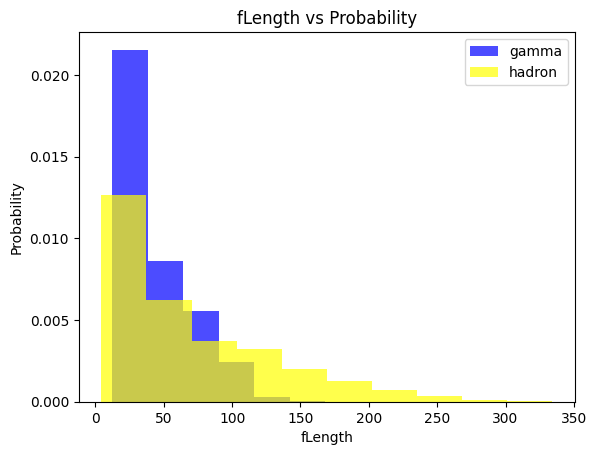

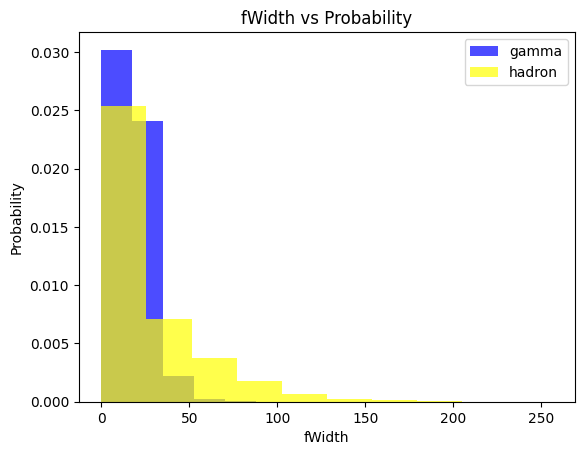

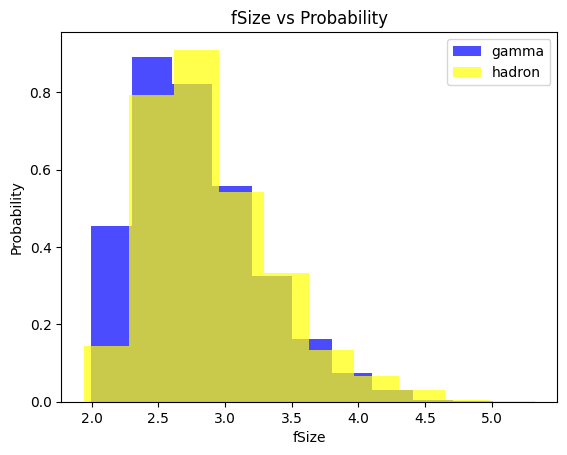

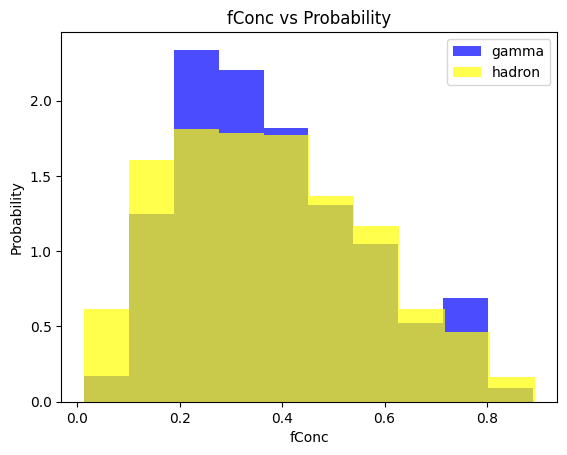

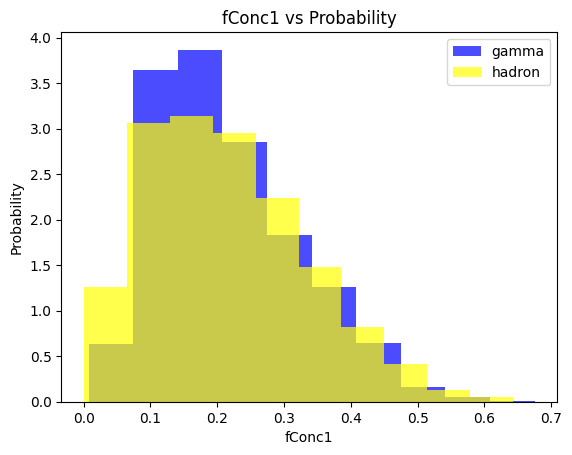

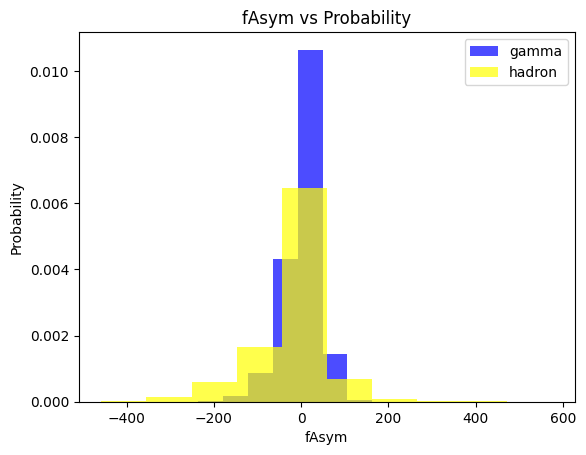

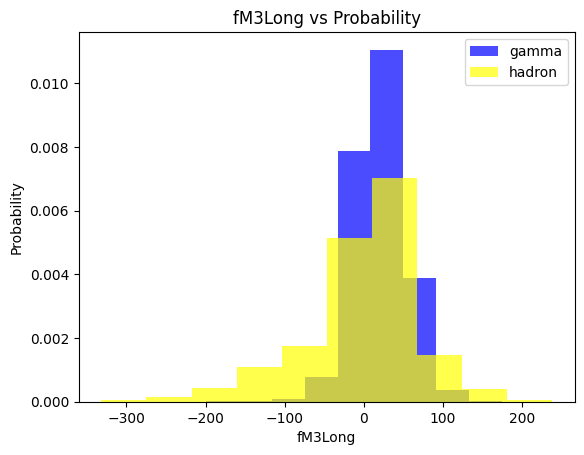

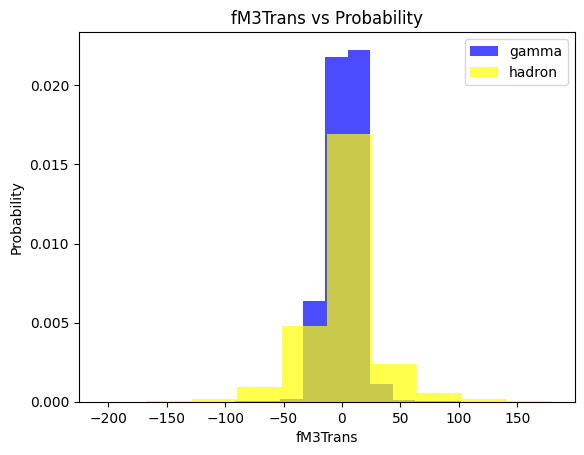

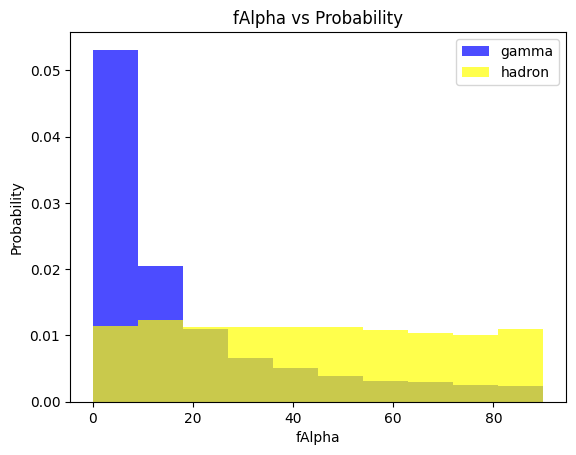

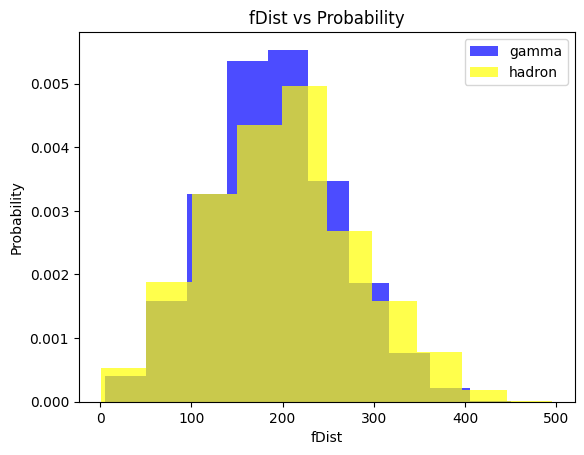

In [5]:
for i in cols[:-1]:
  plt.hist(df[df['class']==1][i], color='blue', label='gamma', alpha=.7, density=True)
  plt.hist(df[df['class']==0][i], color='yellow', label='hadron', alpha=.7, density=True)
  plt.title(f"{i} vs Probability")
  plt.xlabel(i)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()
  print()

# Train, Test, Validation datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [7]:
def scale_dataset(df, oversample=False):
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [8]:
df['class'].value_counts()

class
1    12331
0     6688
Name: count, dtype: int64

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [10]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [11]:
print(sum(y_train==0))
print(sum(y_train==1))

7400
7400


# kNN (K-Nearest Neighbour)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# for importing the kNN classifier

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
from sklearn.metrics import classification_report

In [15]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1351
           1       0.83      0.89      0.86      2453

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

P(B|A) = P(A|B) * P(B) / P(A)

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52      1351
           1       0.74      0.90      0.81      2453

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

the equation for line of regression is, y^ = mx + b

here, y can be replaced by odds

=> p/(1-p) = mx + b

but there is a problem with this equation, it's that the odds might take negative values, therefore to tackle this situation we take natural log for the odds.

=> ln(p/(1-p)) = mx + b

=> p/(1-p) = e^(mx + b)

=> p = e^(mx + b) -p*e^(mx + b)

=> p(1 + e^(mx + b)) = e^(mx + b)

=> p = e^(mx + b)/(1 + e^(mx + b))

=> p = 1/(1 + e^-((mx + b)))

This is a form of a special function called ***sigmoid***

S(y) = 1/(1 + e^-y)

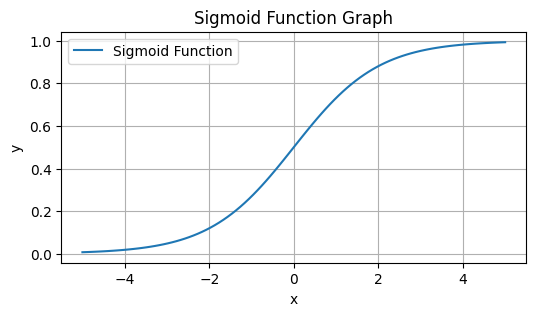

# Code for drawing the graph

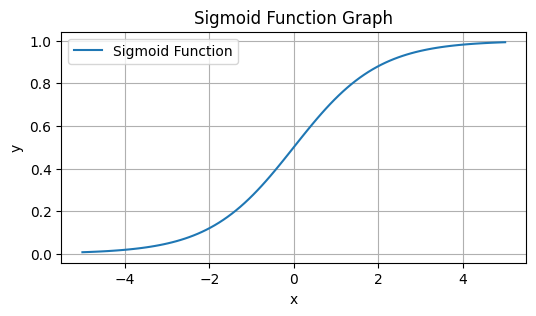

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  """
  Sigmoid function, also known as logistic function.
  """
  return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)  # Range of x-values
y = sigmoid(x)
plt.figure(figsize=(6,3))
plt.plot(x, y, label='Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function Graph')
plt.grid(True)
plt.legend()
plt.show()

When we have only one data point, we call this ***Simple Logistic Regression***, but when we have multiple, we call it ***Multiple Logistic Regression***

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model = LogisticRegression()

In [23]:
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1351
           1       0.85      0.83      0.84      2453

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



# Support Vector Machines (SVM)

In this, we try to draw a line that will divide the two types of classifications, just so that only one type of class is at each side of the line or plane in case of 3D.

In making the line, we have to make sure that we have to choose the line which divides the two classes most uniformly, that which is unbiased, therefore we have to choose the one which has the most margin.

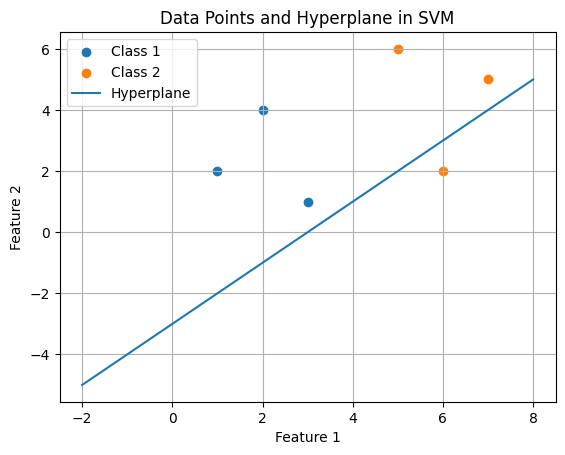

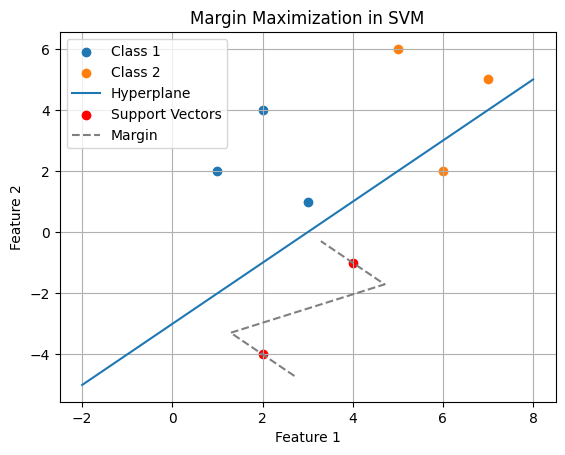

# Code for drawing the graph

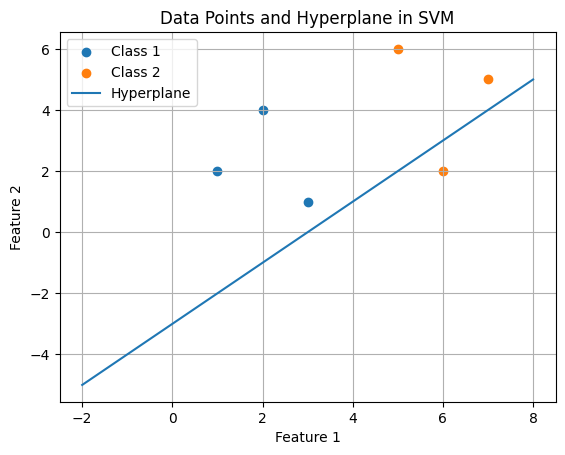

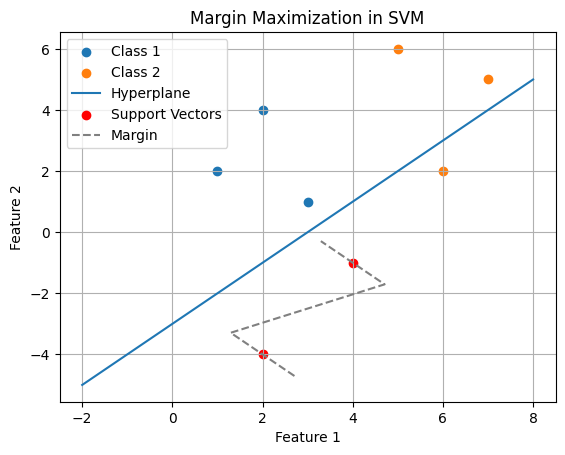

In [24]:
import matplotlib.pyplot as plt
import numpy as np


# Sample data points
data_class_1 = np.array([[1, 2], [3, 1], [2, 4]])
data_class_2 = np.array([[5, 6], [7, 5], [6, 2]])

# Support vectors for each class
support_vectors_class_1 = np.array([[2, 3], [1, 1]])
support_vectors_class_2 = np.array([[4, 2], [5, 4]])

# Define a hyperplane (w = [1, -1], b = -3) for illustration purposes
w = np.array([1, -1])
b = -3

def plot_data_and_hyperplane():
  plt.scatter(data_class_1[:, 0], data_class_1[:, 1], label='Class 1')
  plt.scatter(data_class_2[:, 0], data_class_2[:, 1], label='Class 2')

  # Plot the hyperplane
  x_values = np.linspace(-2, 8, 100)
  y_values = -(w[0] * x_values + b) / w[1]
  plt.plot(x_values, y_values, label='Hyperplane')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Data Points and Hyperplane in SVM')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_margin_maximization():
  plt.scatter(data_class_1[:, 0], data_class_1[:, 1], label='Class 1')
  plt.scatter(data_class_2[:, 0], data_class_2[:, 1], label='Class 2')

  # Project support vectors onto the hyperplane for visualization
  projected_support_vector_1 = np.dot(w, support_vectors_class_1[0]) + b
  projected_support_vector_2 = np.dot(w, support_vectors_class_2[0]) + b
  projected_support_vectors = np.array([(support_vectors_class_1[0][0], projected_support_vector_1),
                                       (support_vectors_class_2[0][0], projected_support_vector_2)])

  # Plot the hyperplane (same as above)
  x_values = np.linspace(-2, 8, 100)
  y_values = -(w[0] * x_values + b) / w[1]
  plt.plot(x_values, y_values, label='Hyperplane')

  # Highlight support vectors and margin lines (perpendicular to hyperplane)
  plt.scatter(projected_support_vectors[:, 0], projected_support_vectors[:, 1], marker='o', c='red', label='Support Vectors')

  margin_vector = w / np.linalg.norm(w)  # Unit vector in the direction of w
  margin_lines = np.array([projected_support_vectors[0] + margin_vector,
                           projected_support_vectors[0] - margin_vector,
                           projected_support_vectors[1] + margin_vector,
                           projected_support_vectors[1] - margin_vector])
  plt.plot(margin_lines[:, 0], margin_lines[:, 1], linestyle='--', color='gray', label='Margin')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Margin Maximization in SVM')
  plt.legend()
  plt.grid(True)
  plt.show()

# Plot the first graph (data points and hyperplane)
plot_data_and_hyperplane()

# Plot the second graph (margin maximization)
plot_margin_maximization()

When we have a 1D dataset where we have difficulty in using SVM, we just square the numbers, and then find the line, this is called the kernel trick:->

***x*** -> ****(x******2***, x)***

In [25]:
from sklearn.svm import SVC #support vector classifier

In [26]:
svm_model = SVC()

In [27]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1351
           1       0.88      0.90      0.89      2453

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Networks

there are three layers to a neural net, the input layer, the output layer, and the hidden layer. We take the sum of all the products of the inputs with their respective weights and then increment the resultant with a ***bias***(something that will help shift the neural net towards the output that we desire) and then put the overall through the hidden layer from which it goes into the activation function and thus at the end produce an output.

Without an activation function a neural network will just be a linear model.

There are three activation functions:-

1) Sigmoid
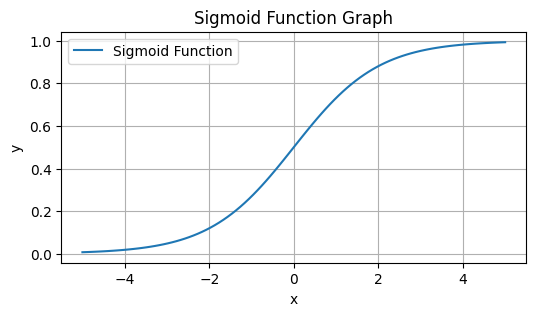

2) Tanh
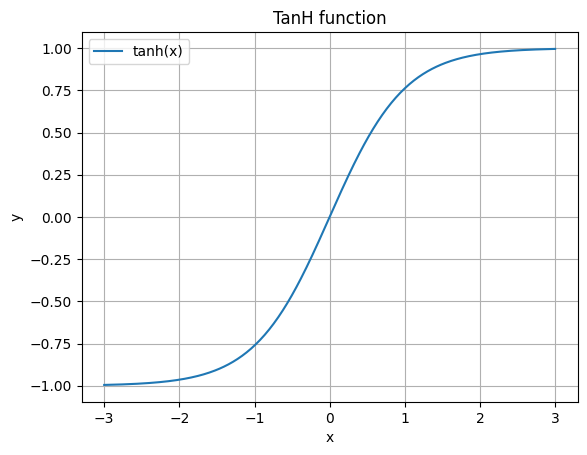

3)ReLU
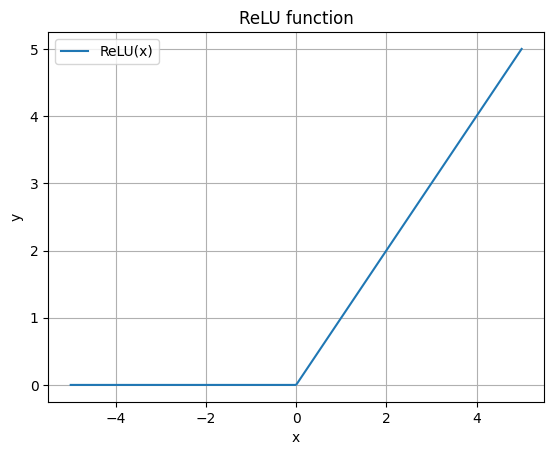

# Backpropagation

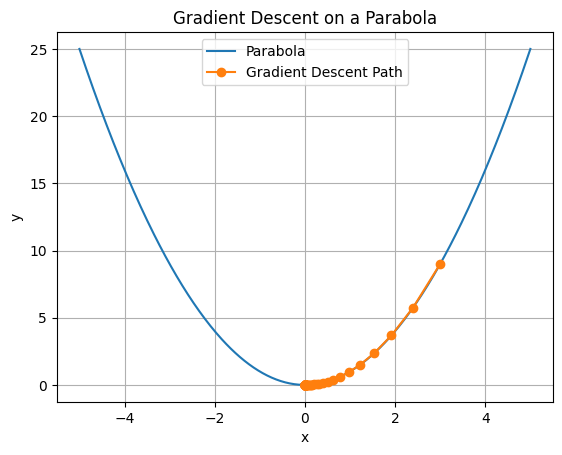

W0new = W0old + α * (gradient descent)

Here, α -> Learning rate.

So here's the explanation, we take a quadratic loss function, so according to the function, as the value of x increases, the resultant increases at an exponential rate, but as the value of x decreases it also decreases at a very fast rate especially if x < 1.

Therefore, we try to minimize the loss by descending towards the origin, hence there's the formula

In [32]:
import tensorflow as tf

In [50]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

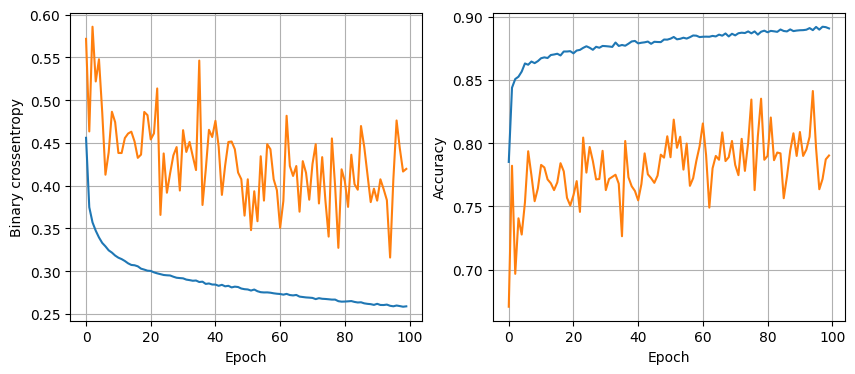

In [51]:
plot_history(history)

In [39]:
#neural net model
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob), #randomly takes some points and dont train them to prevent overfitting
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
      #sigmoid because according to it's graph the output would be easier to classify as either 0 or 1
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  #set verbose=0 if u dont want to see the epochs
  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=.2, verbose=0)

  return nn_model, history

16 nodes, dropout 0, learning_rate: 0.01, batch_size: 32


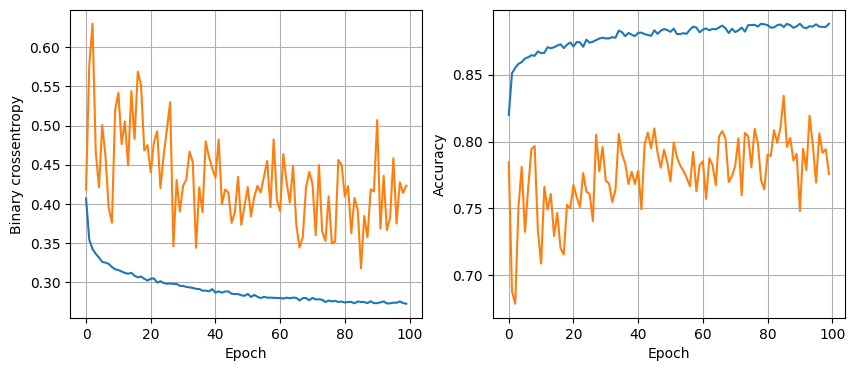

119/119 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8759
16 nodes, dropout 0, learning_rate: 0.01, batch_size: 64


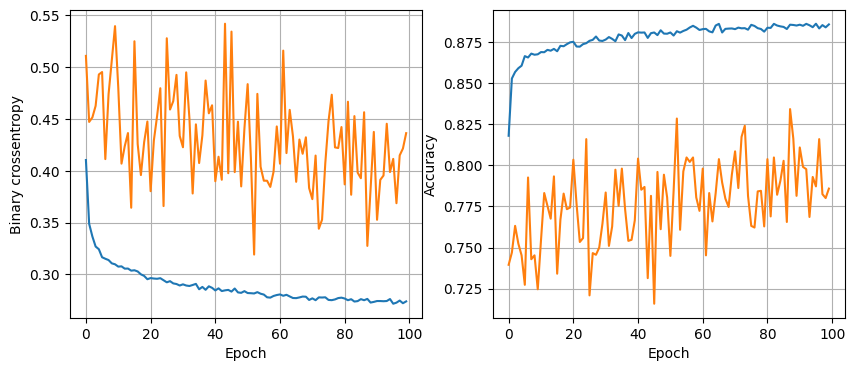

119/119 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8749
16 nodes, dropout 0, learning_rate: 0.01, batch_size: 128


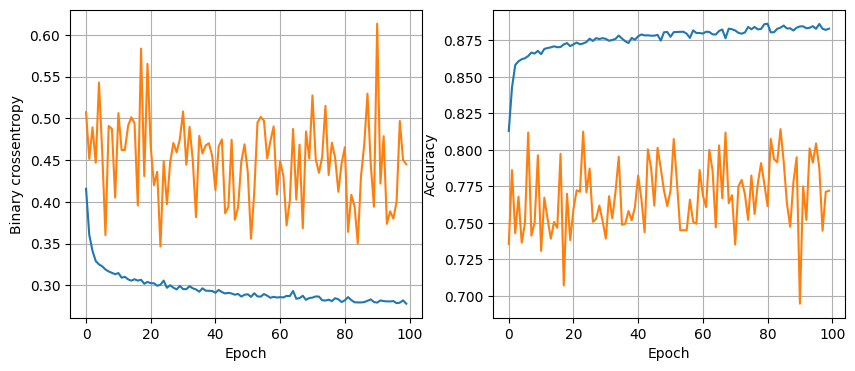

119/119 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8691
16 nodes, dropout 0, learning_rate: 0.005, batch_size: 32


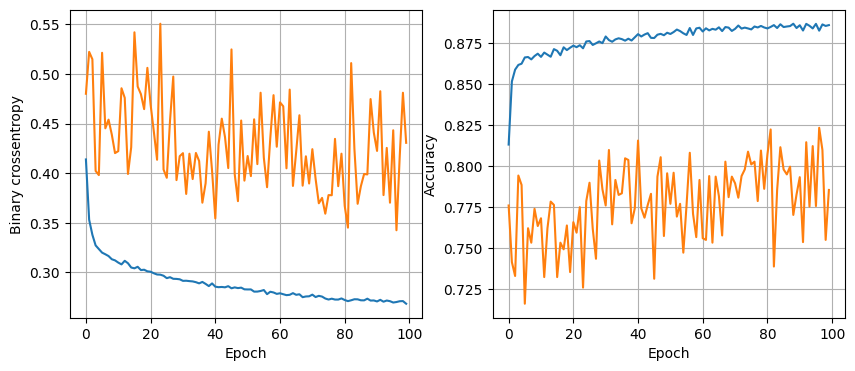

119/119 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8738
16 nodes, dropout 0, learning_rate: 0.005, batch_size: 64


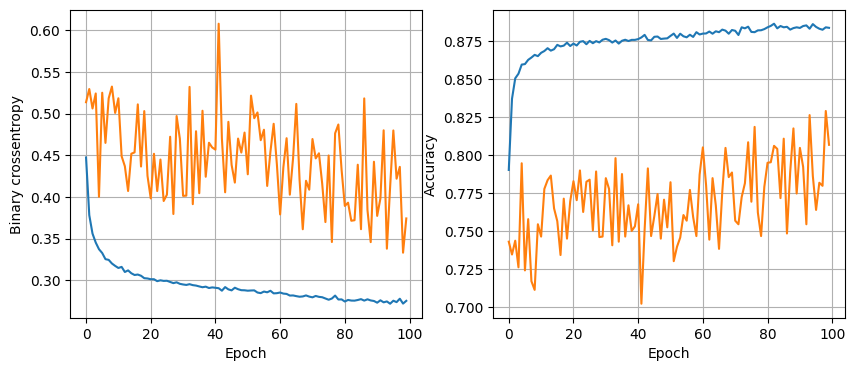

119/119 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8657
16 nodes, dropout 0, learning_rate: 0.005, batch_size: 128


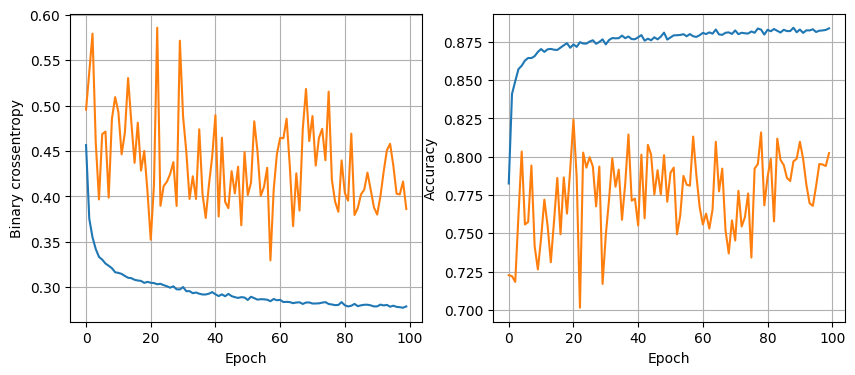

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8691
16 nodes, dropout 0, learning_rate: 0.001, batch_size: 32


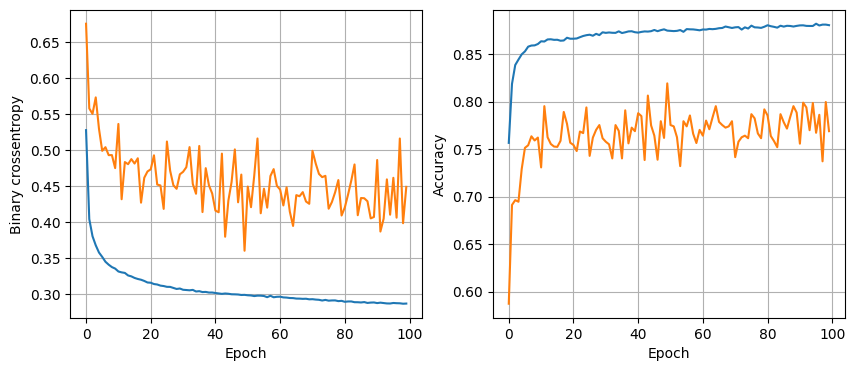

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8736
16 nodes, dropout 0, learning_rate: 0.001, batch_size: 64


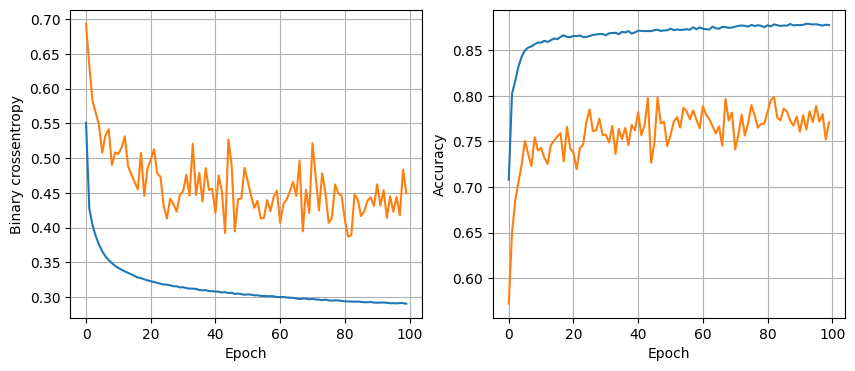

119/119 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8715
16 nodes, dropout 0, learning_rate: 0.001, batch_size: 128


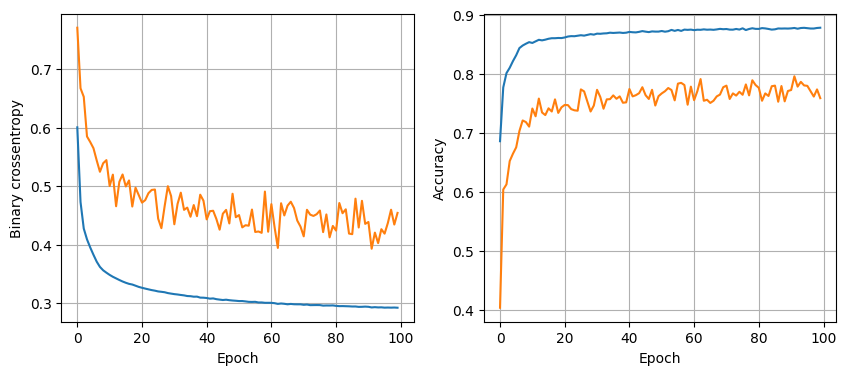

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8725
16 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 32


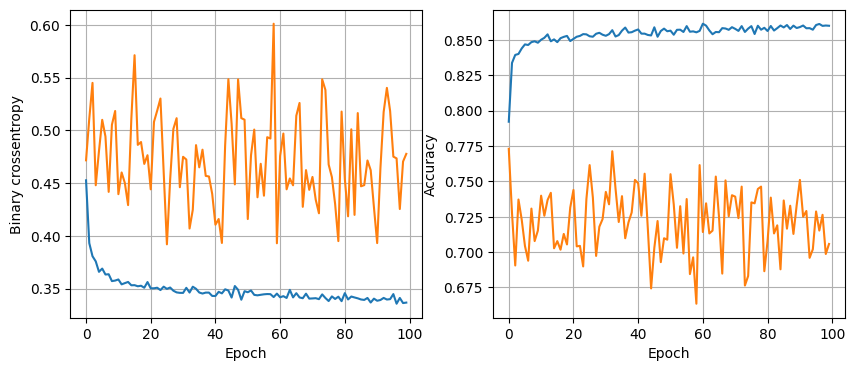

119/119 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8680
16 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 64


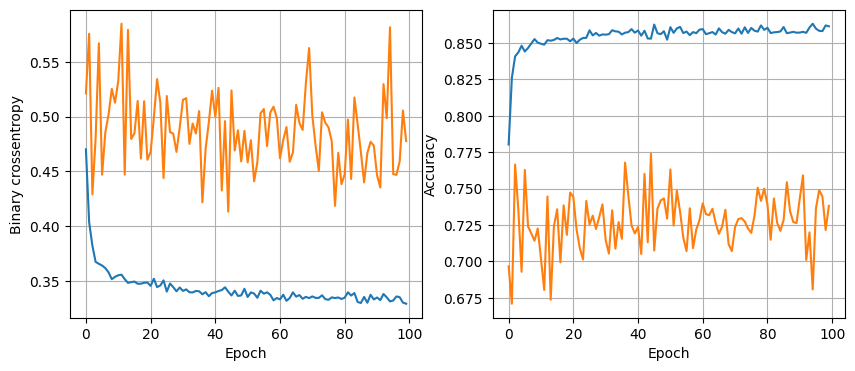

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8707
16 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 128


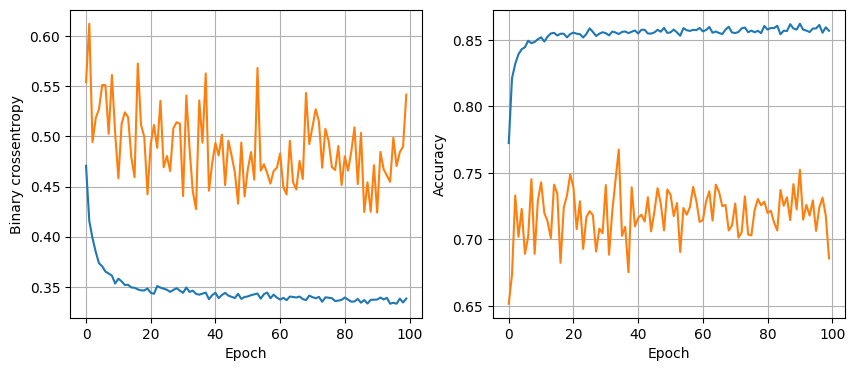

119/119 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8678
16 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 32


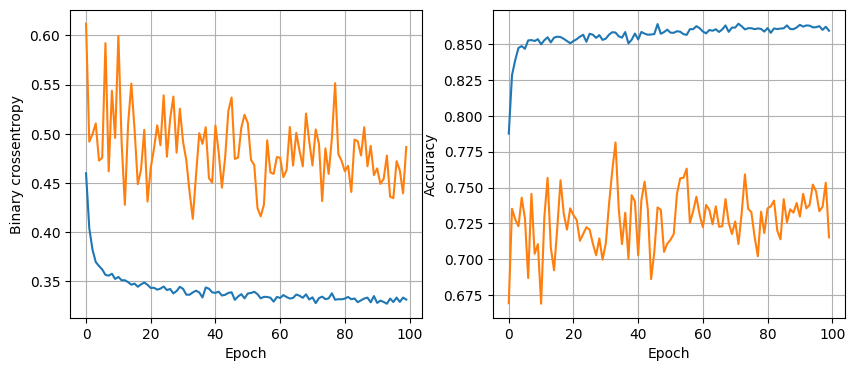

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8693
16 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 64


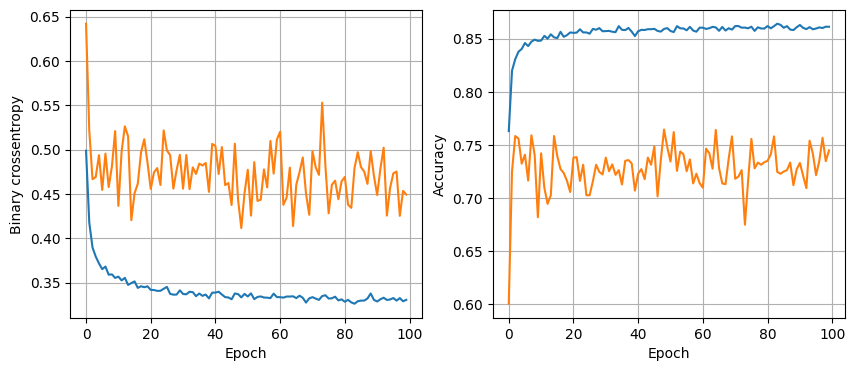

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8751
16 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 128


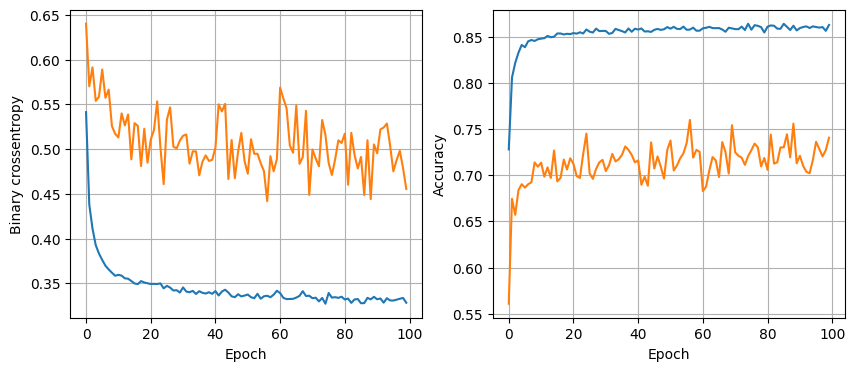

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8775
16 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 32


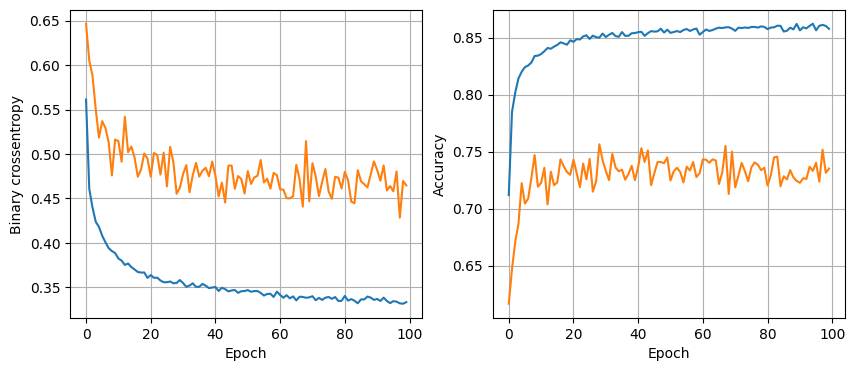

119/119 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8743
16 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 64


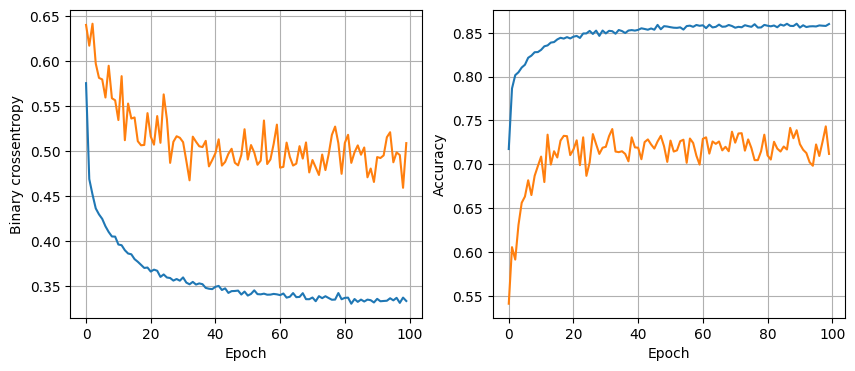

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8665
16 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 128


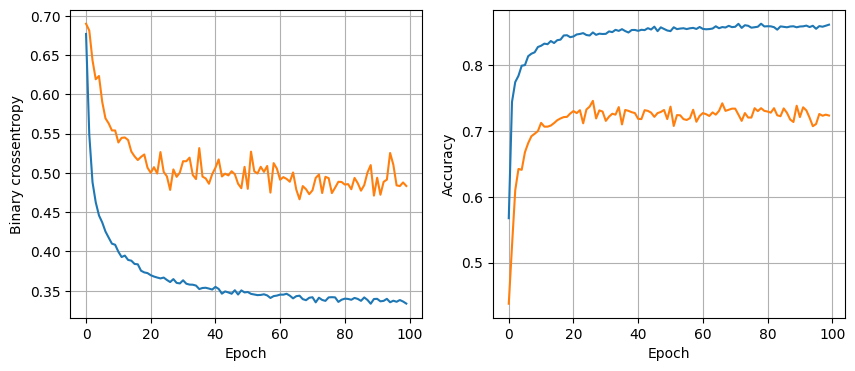

119/119 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8662
32 nodes, dropout 0, learning_rate: 0.01, batch_size: 32


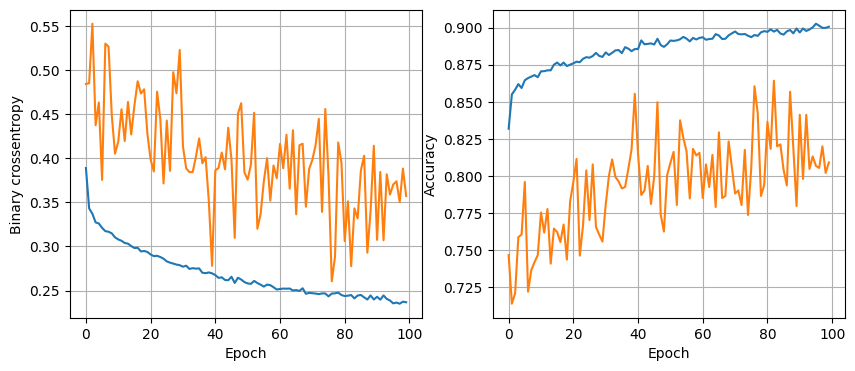

119/119 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8630
32 nodes, dropout 0, learning_rate: 0.01, batch_size: 64


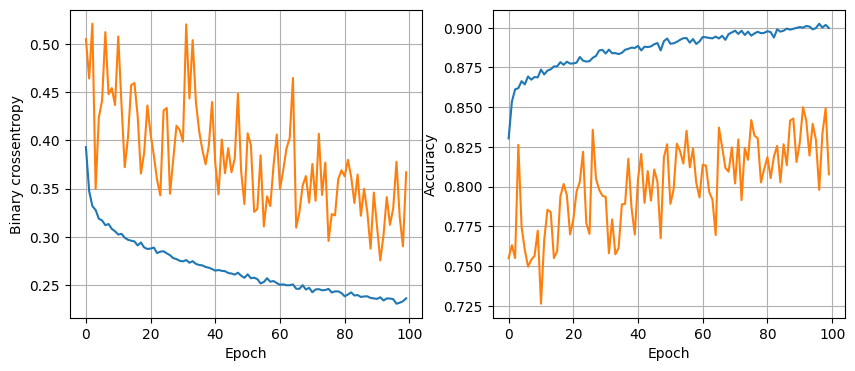

119/119 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8659
32 nodes, dropout 0, learning_rate: 0.01, batch_size: 128


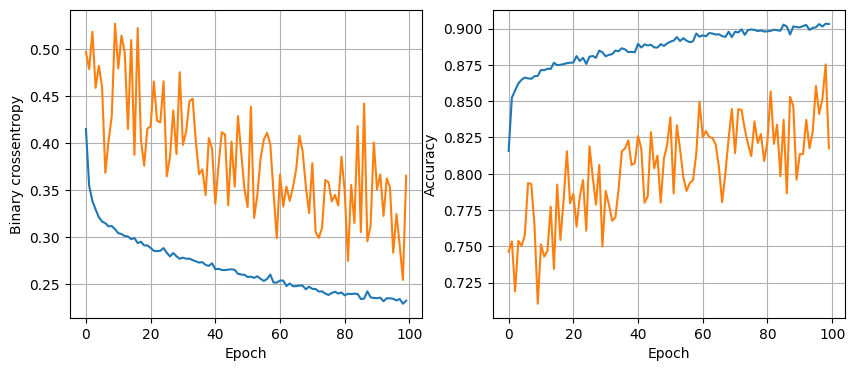

119/119 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8670
32 nodes, dropout 0, learning_rate: 0.005, batch_size: 32


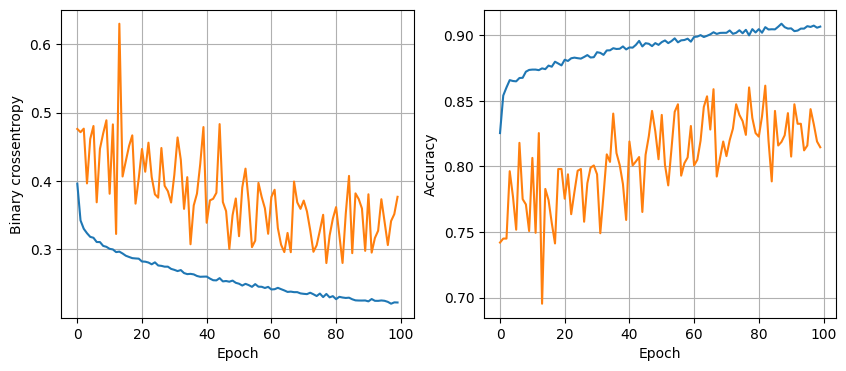

119/119 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.8644
32 nodes, dropout 0, learning_rate: 0.005, batch_size: 64


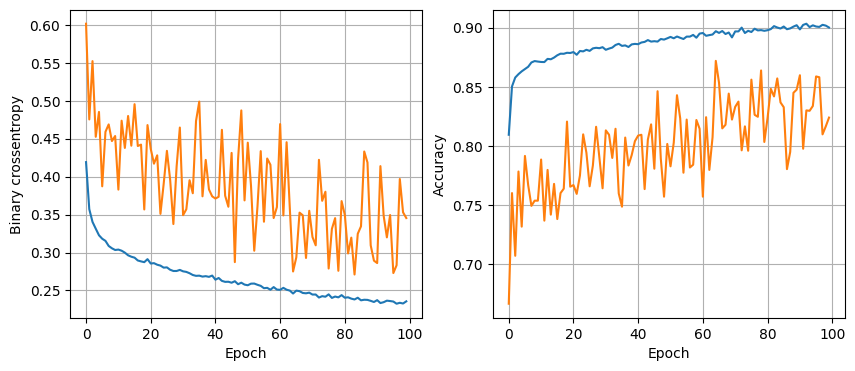

119/119 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8657
32 nodes, dropout 0, learning_rate: 0.005, batch_size: 128


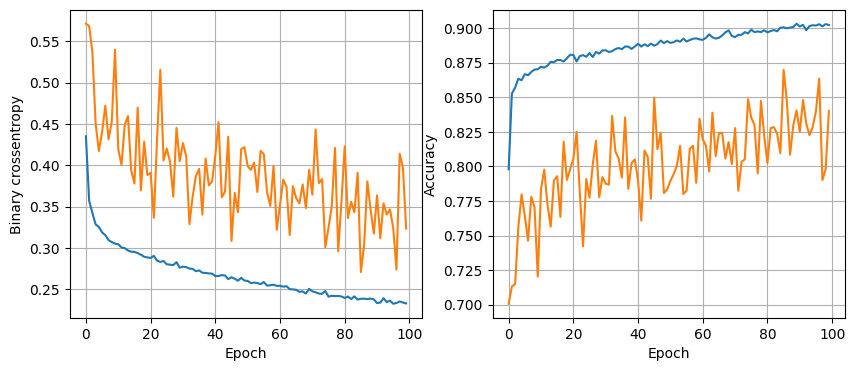

119/119 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8646
32 nodes, dropout 0, learning_rate: 0.001, batch_size: 32


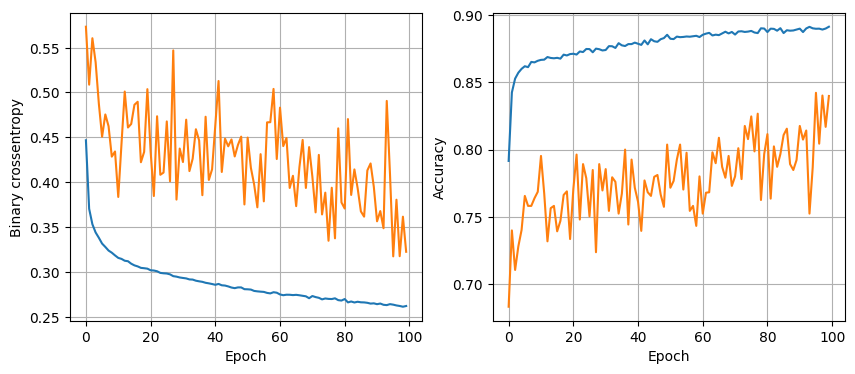

119/119 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8696
32 nodes, dropout 0, learning_rate: 0.001, batch_size: 64


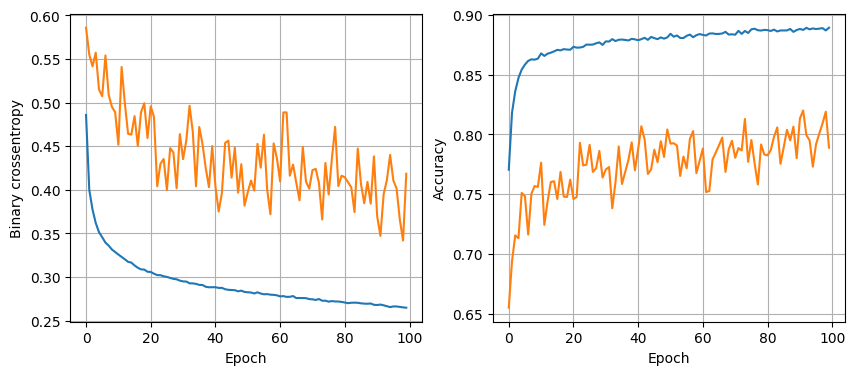

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8741
32 nodes, dropout 0, learning_rate: 0.001, batch_size: 128


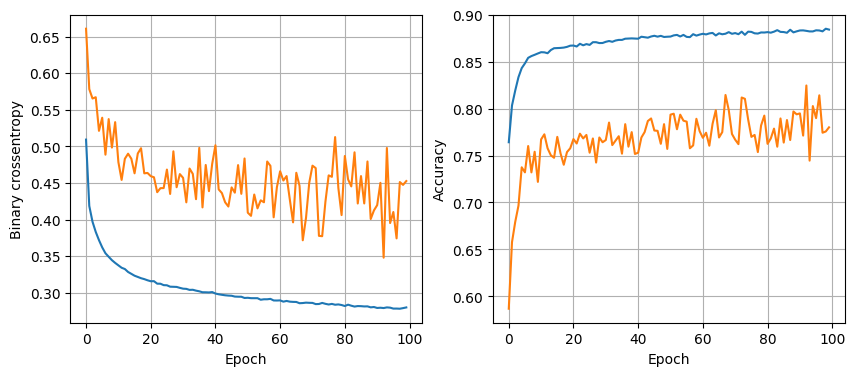

119/119 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8696
32 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 32


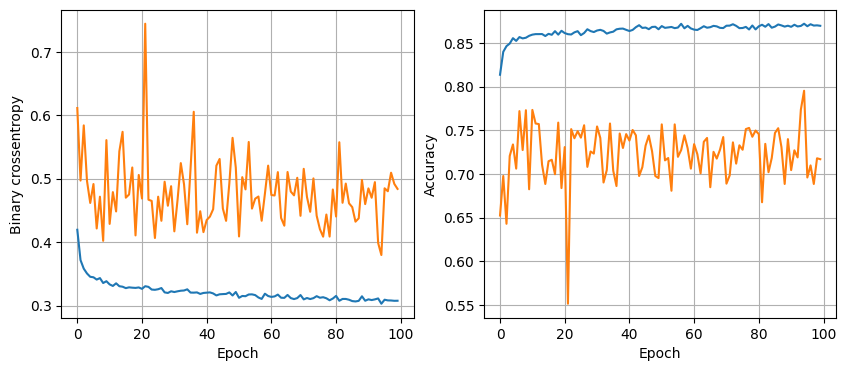

119/119 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8696
32 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 64


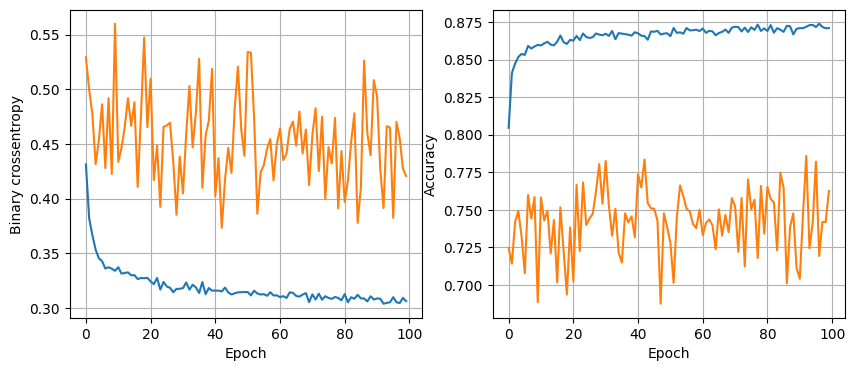

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8728
32 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 128


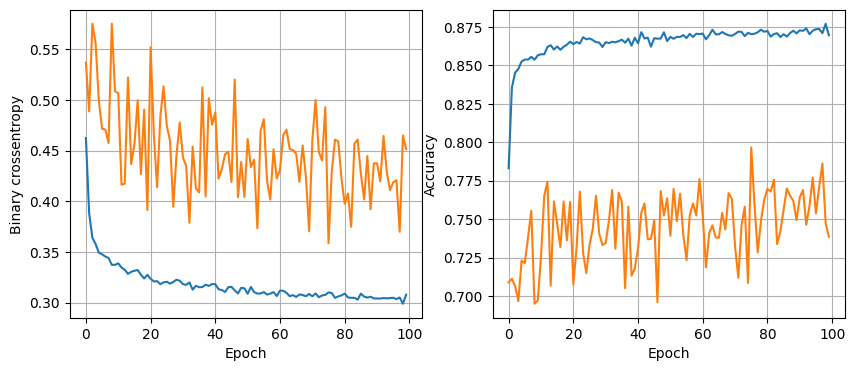

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8738
32 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 32


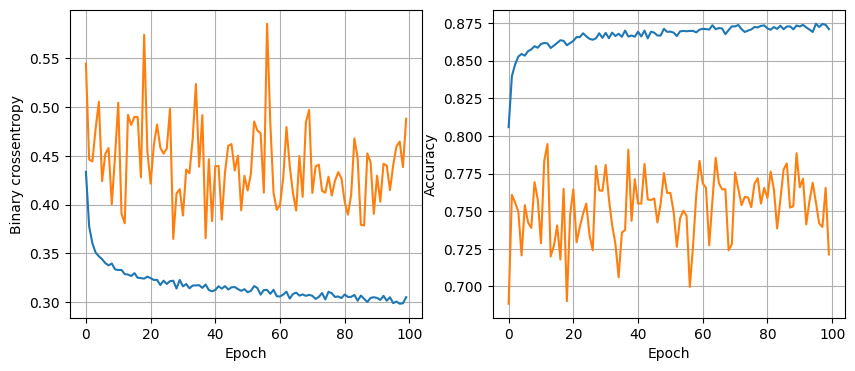

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8720
32 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 64


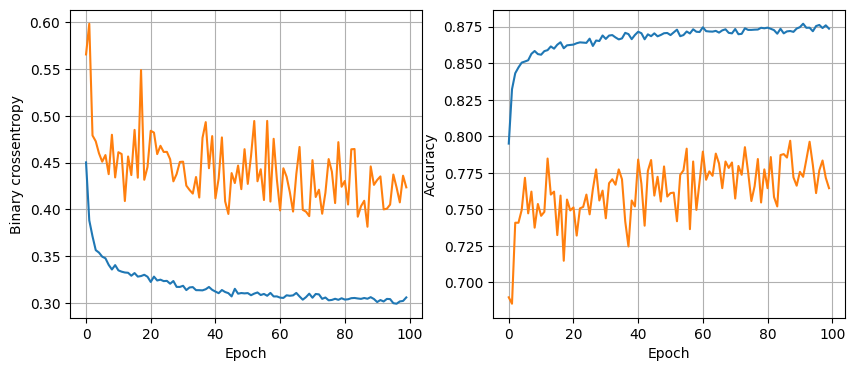

119/119 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8783
32 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 128


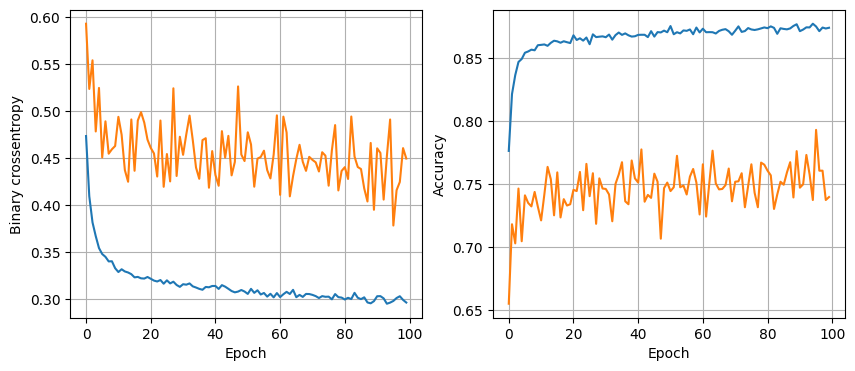

119/119 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8733
32 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 32


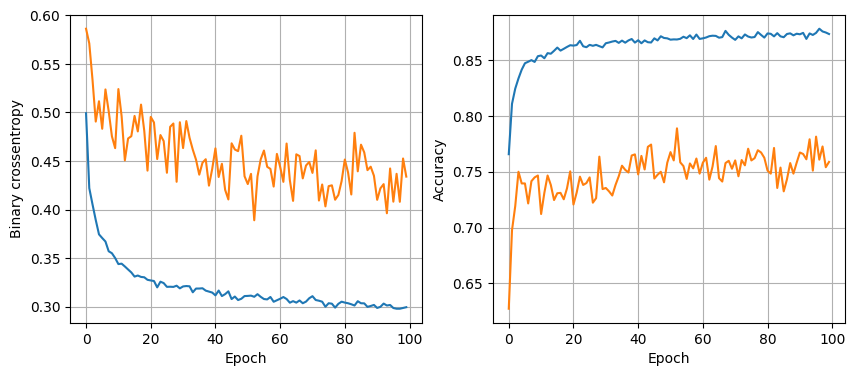

119/119 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8785
32 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 64


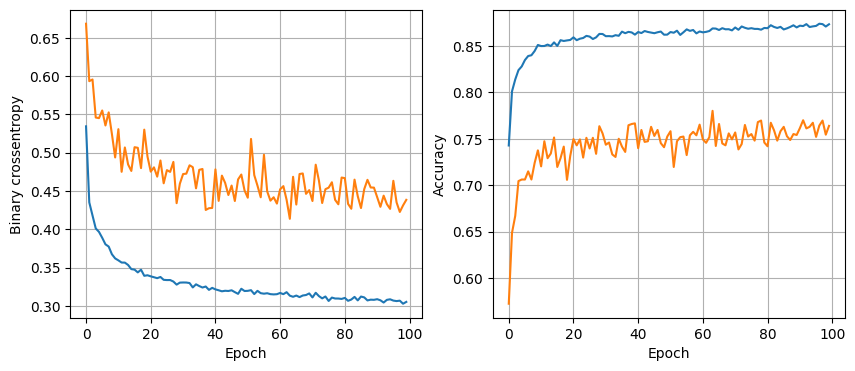

119/119 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8770
32 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 128


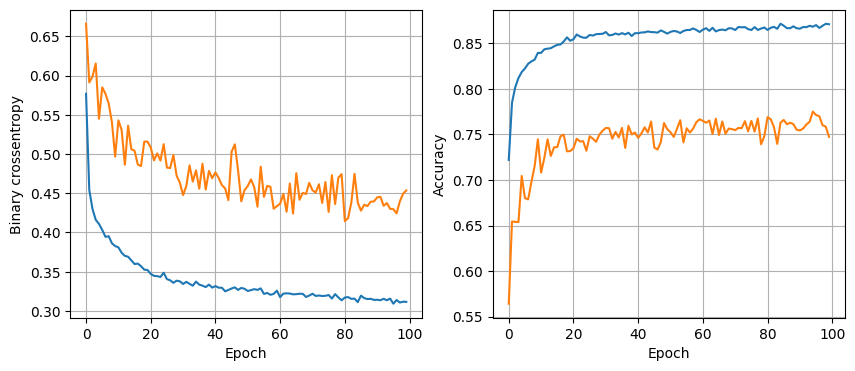

119/119 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8741
64 nodes, dropout 0, learning_rate: 0.01, batch_size: 32


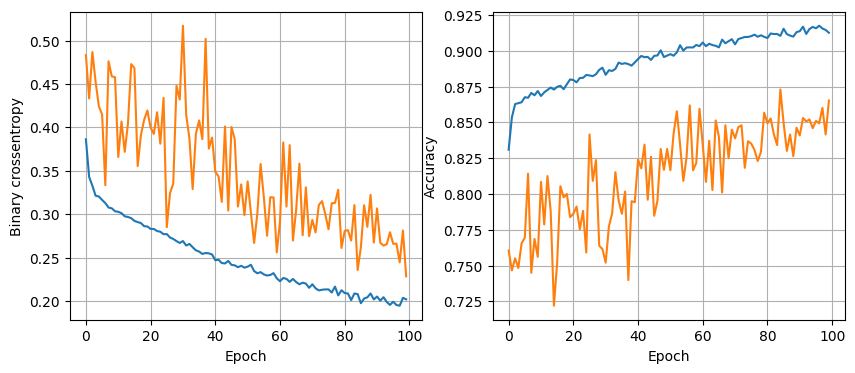

119/119 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8641
64 nodes, dropout 0, learning_rate: 0.01, batch_size: 64


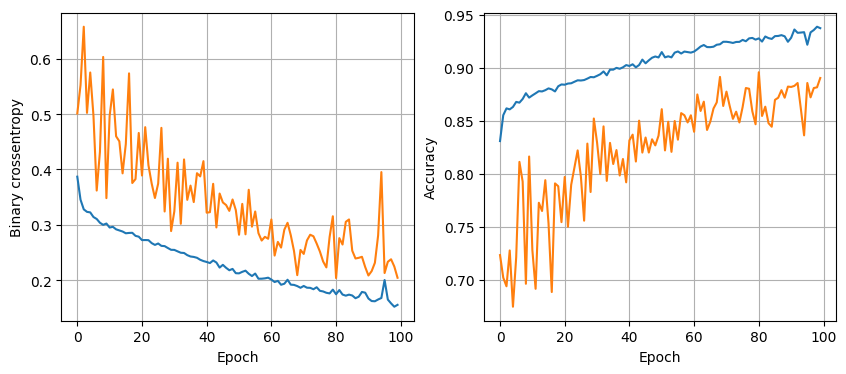

119/119 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.8573
64 nodes, dropout 0, learning_rate: 0.01, batch_size: 128


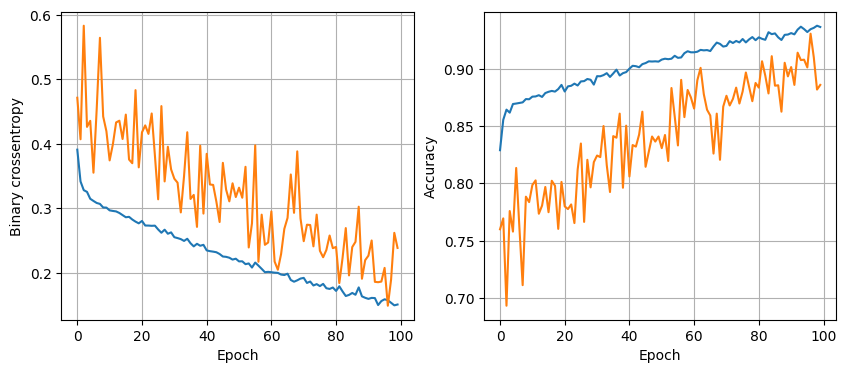

119/119 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.8594
64 nodes, dropout 0, learning_rate: 0.005, batch_size: 32


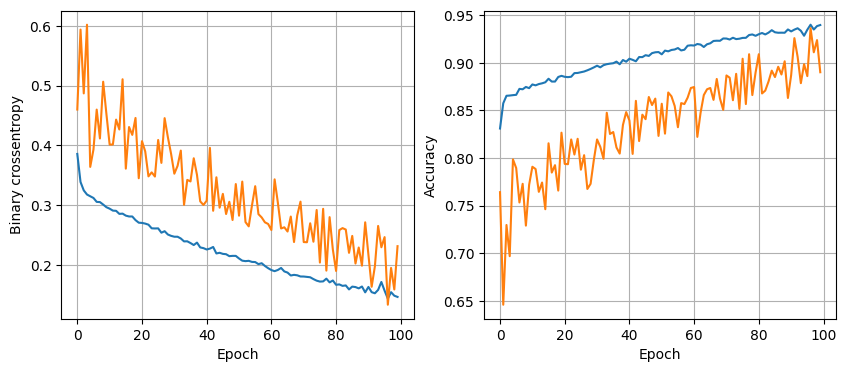

119/119 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.8494
64 nodes, dropout 0, learning_rate: 0.005, batch_size: 64


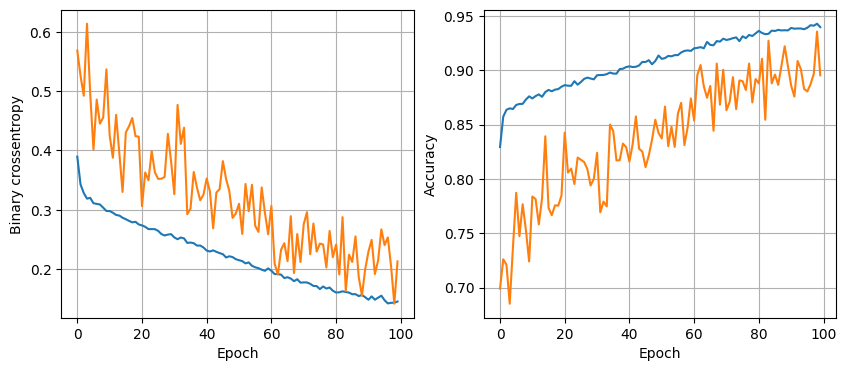

119/119 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.8565
64 nodes, dropout 0, learning_rate: 0.005, batch_size: 128


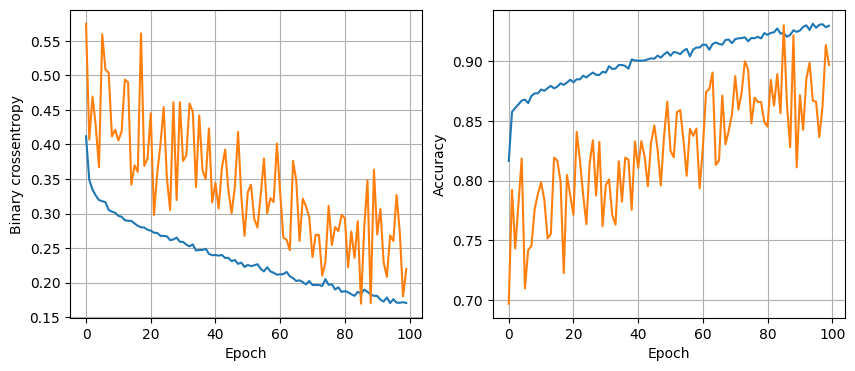

119/119 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8623
64 nodes, dropout 0, learning_rate: 0.001, batch_size: 32


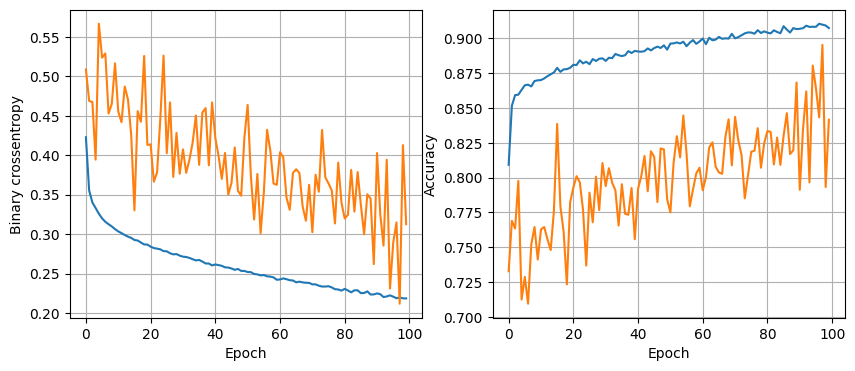

119/119 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8688
64 nodes, dropout 0, learning_rate: 0.001, batch_size: 64


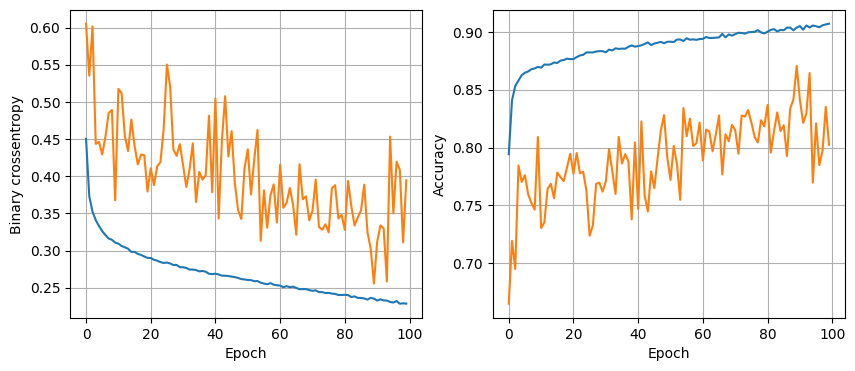

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8707
64 nodes, dropout 0, learning_rate: 0.001, batch_size: 128


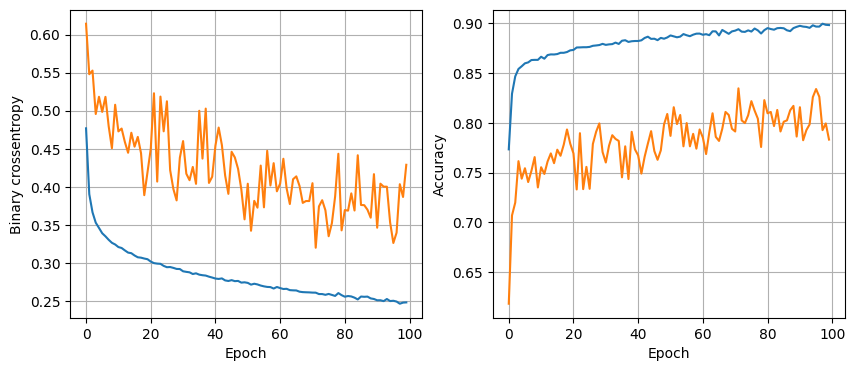

119/119 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8746
64 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 32


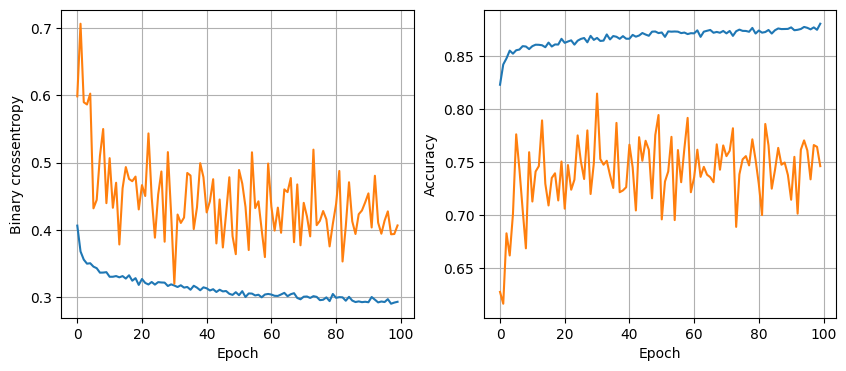

119/119 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8788
64 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 64


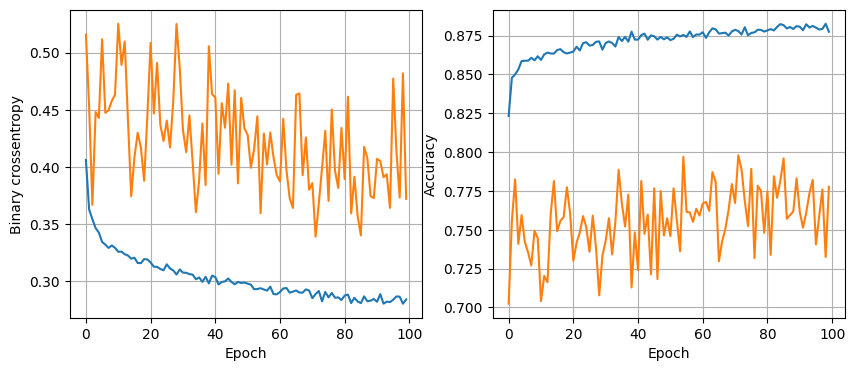

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8772
64 nodes, dropout 0.2, learning_rate: 0.01, batch_size: 128


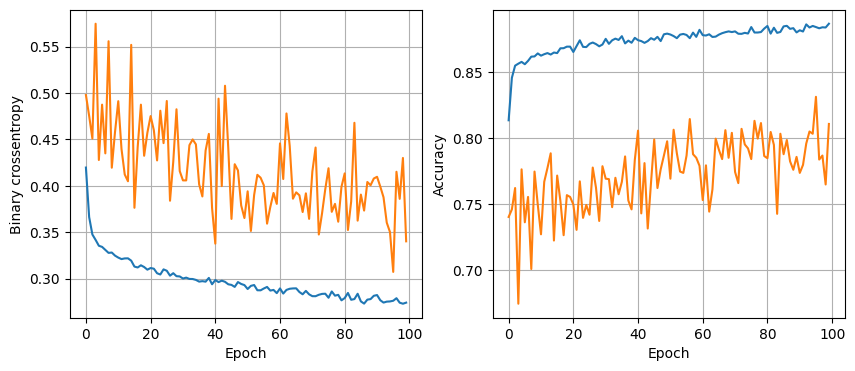

119/119 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8796
64 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 32


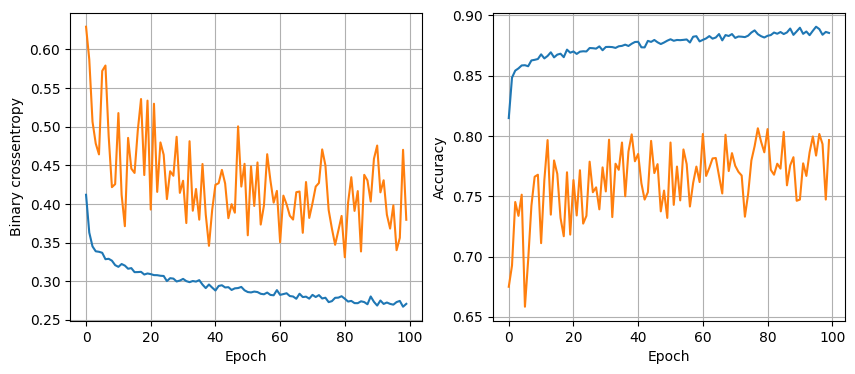

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8817
64 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 64


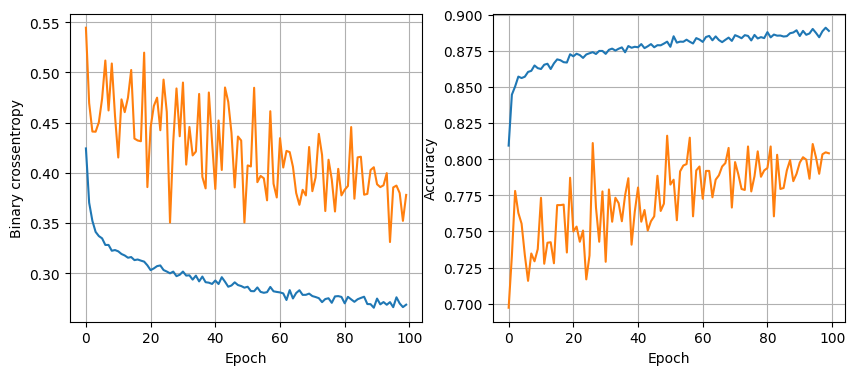

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8809
64 nodes, dropout 0.2, learning_rate: 0.005, batch_size: 128


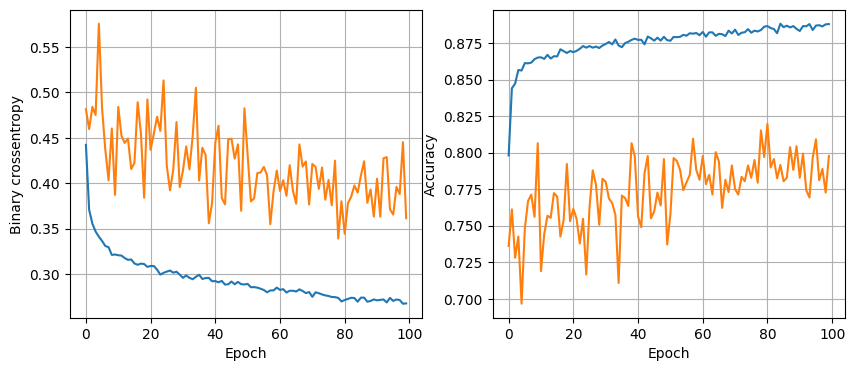

119/119 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8793
64 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 32


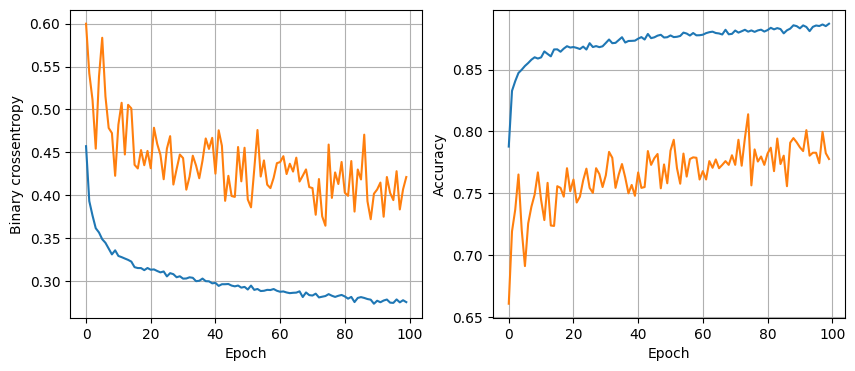

119/119 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.8772
64 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 64


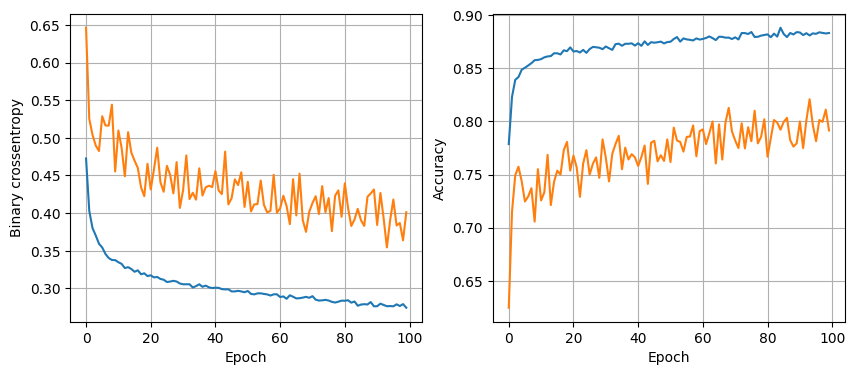

119/119 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8783
64 nodes, dropout 0.2, learning_rate: 0.001, batch_size: 128


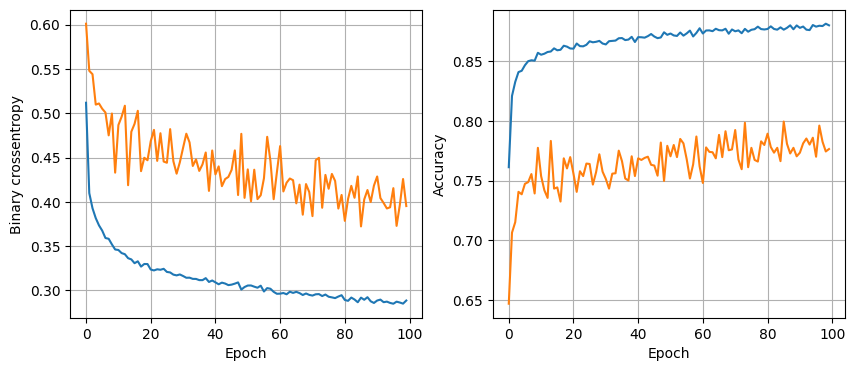

119/119 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8788
Least Validation Loss: 0.2977295517921448
Least Loss Model: <keras.src.engine.sequential.Sequential object at 0x7d55c3e15360>


In [54]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0,.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, learning_rate: {lr}, batch_size: {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model
print(f"Least Validation Loss: {least_val_loss}\nLeast Loss Model: {least_loss_model}")

In [56]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1351
           1       0.87      0.94      0.91      2453

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.86      3804
weighted avg       0.87      0.87      0.87      3804

